In [1]:
import os

os.chdir(r'../datacode')

In [5]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
!matplotlib inline

sns.set(color_codes=True)

path = 'coffee_info.csv'
coffee = pd.read_csv(path, na_values='NA')
coffee.head()

Traceback (most recent call last):
  File "C:\Users\ariwh\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


,Person_ID,Cups_Per_Week,Age,Gender,Employment,Education,Income,Married,Own_Home,Smoker,Favourite_NonAlc_Drink,Veg,cup_tea,spend_food
0,5,1,60.0,F,fulltime,high school,45000.0,married,no,yes,tea,nonveg,0,11787
1,6,1,40.0,F,fulltime,high school,46000.0,married,no,no,other,veg,6,18674
2,9,3,NaN,F,fulltime,high school,47000.0,married,no,no,coffee,veg,1,14814
3,14,5,20.0,F,fulltime,gradschool,65000.0,single,no,yes,softdrink,nonveg,0,22997
4,15,0,50.0,F,fulltime,high school,46000.0,married,yes,no,coffee,nonveg,5,14606


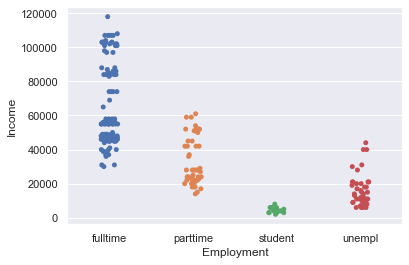

In [6]:
#seaborn are good choice to plot categorical variable

sns.stripplot(x='Employment', y='Income', data=coffee);

C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Employment', ylabel='Income'>

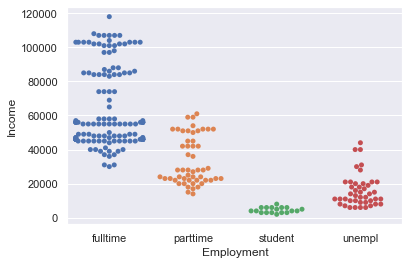

In [7]:
#swarm is use to know qty of observation

sns.swarmplot(x='Employment', y='Income', data=coffee)

<AxesSubplot:xlabel='Employment', ylabel='Income'>

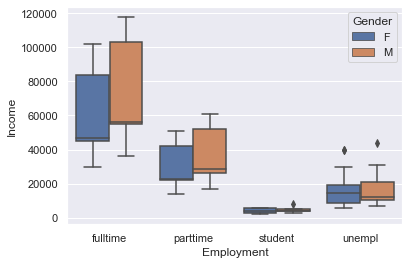

In [8]:
sns.boxplot(x='Employment', y='Income', hue='Gender', data=coffee) 
#hue is second parameter to specify value


<AxesSubplot:xlabel='Married', ylabel='spend_food'>

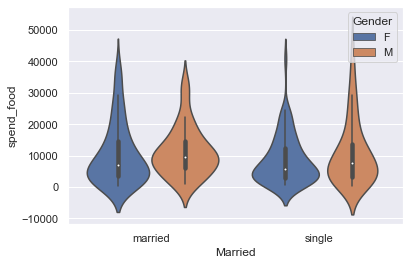

In [9]:
sns.violinplot(x='Married', y='spend_food', hue='Gender', data=coffee) 
#hue is second parameter to specify value


<AxesSubplot:xlabel='Gender', ylabel='Income'>

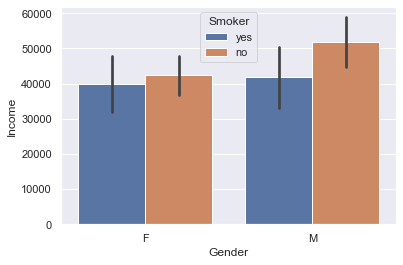

In [11]:
sns.barplot(x='Gender', y='Income', hue='Smoker', data=coffee) 
#hue is second parameter to specify value


C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


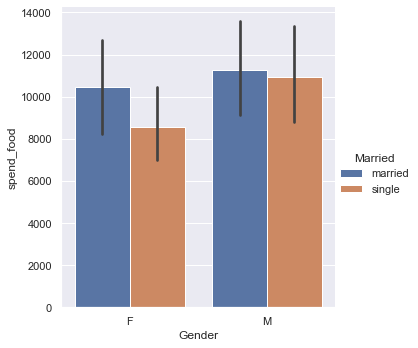

In [13]:
sns.factorplot(x='Gender', y='spend_food', hue='Married', data=coffee, kind='bar');
#hue is second parameter to specify value


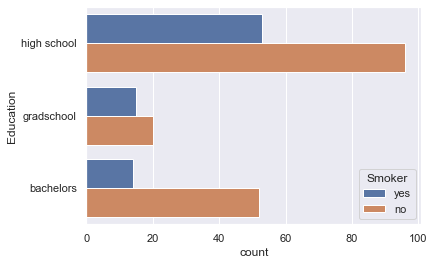

In [14]:
sns.countplot(y='Education', hue='Smoker', data=coffee);
#hue is second parameter to specify value


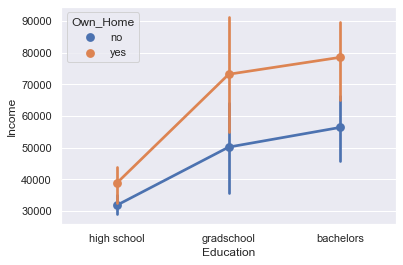

In [16]:
sns.pointplot(x='Education', y='Income', hue='Own_Home', data=coffee);
#parallel but different slope


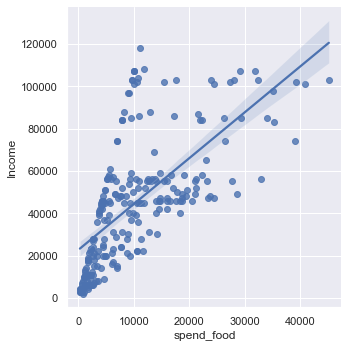

In [17]:
sns.lmplot(x='spend_food', y='Income', data=coffee, fit_reg=True);
#Regression model


In [19]:
path1 = 'carprice.csv'
car = pd.read_csv(path1, na_values='NA')
car.head()


,car_id,price,Kilometers,hp,Brand,Sport,age,Users,gas,Metalilic,CC,Weight,QuartTax,Automatic,red,Owner_gender,door
0,3548,48750,NaN,110,6,YES,7,1,590.0,NO,1800,1170.0,100,YES,NO,M,4
1,903,16610,NaN,110,3,NO,8,1,391.0,YES,2200,1250.0,270,YES,NO,F,4
2,3903,27100,3040.0,110,2,YES,8,1,478.0,NO,1900,1186.0,120,YES,YES,M,4
3,5098,24240,4690.0,110,5,NO,8,1,NaN,NO,1800,1170.0,100,YES,NO,M,4
4,3364,13030,5820.0,110,5,NO,9,1,NaN,YES,2200,1250.0,80,NO,NO,F,4


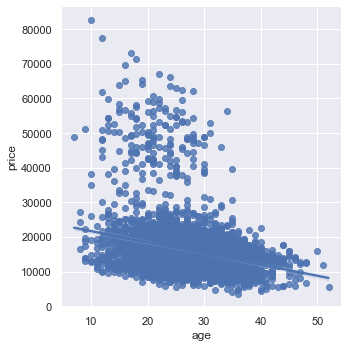

In [20]:
sns.lmplot(x='age', y='price', data=car)

<AxesSubplot:xlabel='Users', ylabel='Density'>

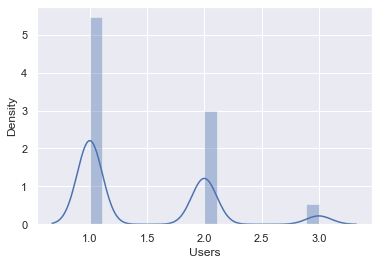

In [22]:
sns.distplot(car.Users)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '18'),
  Text(12, 0, '19')])

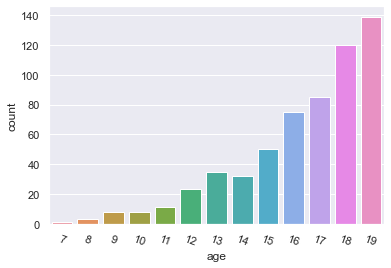

In [26]:
old_cars = car[(car.age<20)]
sns.countplot(x='age', data = old_cars)

plt.xticks(rotation=-20)

C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ariwh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

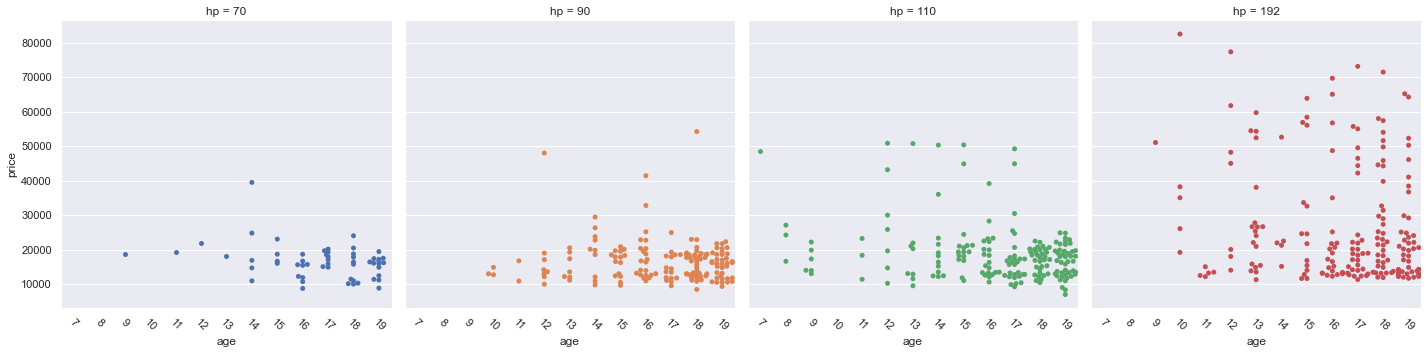

In [31]:
pl = sns.factorplot(x='age', y='price', data=old_cars, hue='hp', col='hp', kind='swarm')

pl.set_xticklabels(rotation=-45)